In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fancyimpute import KNN

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#sklearn models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#one hot
from sklearn.preprocessing import OneHotEncoder

from collections import Counter

/home/kavya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Code for knn imputation
### Did not work: memory error issue

In [3]:
data = pd.read_csv("fully_encoded.csv", low_memory=False)

# Correlation Plot
### Removed columns with correlation against case status less than 0.0001

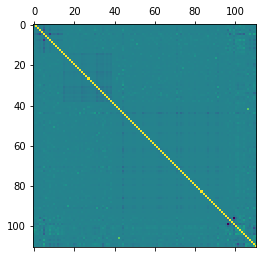

In [4]:
correlation = data.corr()
plt.matshow(correlation)

In [5]:
corr_case_status = correlation["case_status"]
low_val = corr_case_status>0.0001
Counter(list(low_val))

Counter({True: 54, False: 57})

In [6]:
columns = list(data.columns)
new_data = pd.DataFrame()
for a in columns:
    if a=='class_of_admission' or correlation['case_status'][a]>0.0001:
        new_data[a] = data[a]

# Imputation

In [7]:
new_data.drop(['class_of_admission', 'case_status'], axis = 1, inplace = True)

## KNN attempted for imputation. Did not work due to memory issue

## Imputation with mean value

In [8]:
new_data = new_data.fillna(value = new_data.mean().to_dict())

In [20]:
X_normalized = StandardScaler().fit_transform(new_data)
pca = PCA(n_components = 40)
principalComponents = pca.fit_transform(X_normalized)
principalDf = pd.DataFrame(data = principalComponents)

print("explained variance: ", pca.explained_variance_ratio_)
print("total: ", sum(pca.explained_variance_ratio_)*100)

explained variance:  [0.03683723 0.03155406 0.02712959 0.02286852 0.02261273 0.02246267
 0.0218964  0.02142739 0.02120109 0.02070426 0.02030126 0.02014397
 0.02000222 0.01994508 0.01969097 0.0196595  0.01951487 0.01943231
 0.0193912  0.01921754 0.01911313 0.01906389 0.01901883 0.0189723
 0.0189594  0.0189216  0.01891259 0.01887173 0.0188408  0.01883169
 0.01877506 0.0187515  0.01874165 0.01865277 0.01852572 0.01847908
 0.01843542 0.01822565 0.01807447 0.01786745]
total:  82.00275385913264


# Results of PCA
<table>
    <tr>
        <td>Number of Components</td><td>Explained Variance %</td>
    </tr>
    <tr>
        <td>25</td><td>53.5489</td>
    </tr>
    <tr>
        <td>30</td><td>63.1431</td>
    </tr>
    <tr>
        <td>35</td><td>72.6216</td>
    </tr>
    <tr>
        <td>40</td><td>82.004</td>
    </tr>
    <tr>
        <td>45</td><td>90.574</td>
    </tr>
    <tr>
        <td>50</td><td>97.7323</td>
    </tr>
</table>

In [11]:
principalDf['case_status'] = data['case_status']
principalDf['class_of_admission'] = data['class_of_admission']